In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
import datetime as dt
import math
import statsmodels
from IPython.display import display, Markdown
from pathlib import Path

np.random.seed(0)
warnings.simplefilter("ignore")

In [2]:
def bad_line_handler(bad_line):
    print(f"Bad line encountered: {bad_line}")
    return None  # Skip the bad line

BASE_DIR = "E:/EDA/learning-equality-curriculum-recommendations/"
content = pd.read_csv(BASE_DIR+"content.csv", on_bad_lines=bad_line_handler, engine = 'python')
correlations = pd.read_csv(BASE_DIR+"correlations.csv")
topic = pd.read_csv(BASE_DIR+"topics.csv")
sub = pd.read_csv(BASE_DIR+"sample_submission.csv")

display(content.head())
display(topic.head())
display(correlations.head())
display(sub.head())


,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_4054df11a74e,c_3695c5dc1df6 c_f2d184a98231


In [3]:
print("content shape:", content.shape)
print("topic shape:", topic.shape)
print("correlations shape:", correlations.shape)
print("sub shape:", sub.shape)

content shape: (154047, 8)
topic shape: (76972, 9)
correlations shape: (61517, 2)
sub shape: (5, 2)


In [4]:
print("content nan value sum:", content.isna().sum().sum())
print("topic nan value sum:", topic.isna().sum().sum())
print("correlations nan value sum:", correlations.isna().sum().sum())
print("sub nan value sum:", sub.isna().sum().sum())

content nan value sum: 306850
topic nan value sum: 42192
correlations nan value sum: 0
sub nan value sum: 0


In [5]:
def nan_counts_all(df_dict):
    for df_name, df in df_dict.items():
        nan_counts = df.isna().sum()
        print(f"NaN Counts for {df_name}:")
        print(nan_counts)
        print("\n")

df_dict = {
    'Content':content,
    'Topic':topic
}
nan_counts_all(df_dict)

NaN Counts for Content:
id                      0
title                   9
description         64591
kind                    0
text                80012
language                0
copyright_holder    82226
license             80012
dtype: int64


NaN Counts for Topic:
id                 0
title              2
description    42019
channel            0
category           0
level              0
language           0
parent           171
has_content        0
dtype: int64




In [6]:
content["license"] = content["license"].fillna("None")

In [7]:
print("content dublicated value sum:", content.duplicated().sum().sum())
print("topic dublicated value sum:", topic.duplicated().sum().sum())
print("correlations dublicated value sum:", correlations.duplicated().sum().sum())
print("sub dublicated value sum:", sub.duplicated().sum().sum())

content dublicated value sum: 0
topic dublicated value sum: 0
correlations dublicated value sum: 0
sub dublicated value sum: 0


In [9]:
def nunique_all(df_dict):
    for df_name, df in df_dict.items():
        print(f"Number of unique values for {df_name}:")
        for col in df.columns:
            num_unique = df[col].nunique()
            print(f"  Column '{col}': {num_unique}")
        print("\n")

nunique_all(df_dict)

Number of unique values for Content:
  Column 'id': 154047
  Column 'title': 130937
  Column 'description': 76305
  Column 'kind': 5
  Column 'text': 70687
  Column 'language': 27
  Column 'copyright_holder': 148
  Column 'license': 8


Number of unique values for Topic:
  Column 'id': 76972
  Column 'title': 45082
  Column 'description': 23067
  Column 'channel': 171
  Column 'category': 3
  Column 'level': 11
  Column 'language': 28
  Column 'parent': 17512
  Column 'has_content': 2




Value counts for column 'kind':
kind
video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: count, dtype: int64




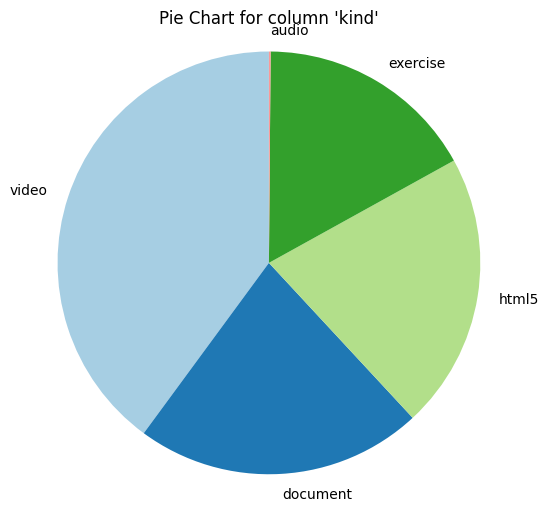

Value counts for column 'language':
language
en     65939
es     30844
fr     10682
pt     10435
ar      7418
bg      6050
hi      4042
zh      3849
gu      3677
bn      2513
sw      1447
it      1300
mr       999
as       641
fil      516
km       505
kn       501
swa      495
or       326
pl       319
te       285
ur       245
tr       225
ta       216
my       206
ru       188
pnb      184
Name: count, dtype: int64




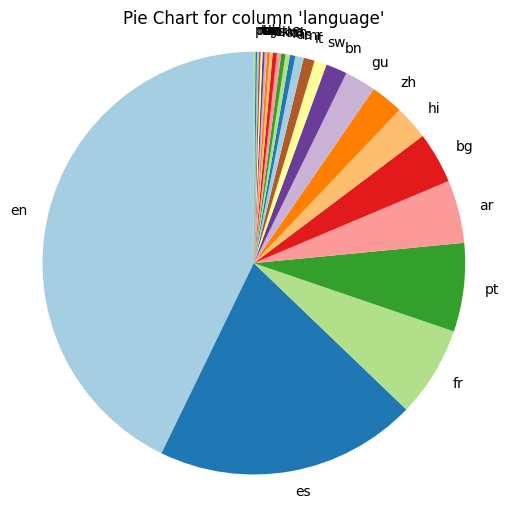

Value counts for column 'license':
license
None             80012
CC BY-NC-SA      52088
CC BY-NC-ND       8714
CC BY             5927
CC BY-SA          4554
Public Domain     2044
CC BY-NC           691
CC BY-ND            17
Name: count, dtype: int64




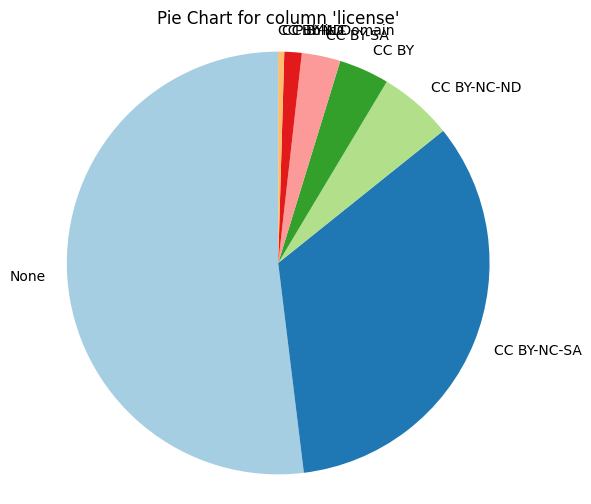

In [10]:
def value_counts_all(df, columns):
    for col in columns:
        print(f"Value counts for column '{col}':")
        print(df[col].value_counts())
        print("\n")
        plt.figure(figsize=(6,6))
        counts = df[col].value_counts()
        plt.pie(counts, labels=counts.index, startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f"Pie Chart for column '{col}'")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

# Call the function with your DataFrame and columns:
value_counts_all(content, ["kind", "language", "license"])

Value counts for column 'category':
category
source          43487
supplemental    19368
aligned         14117
Name: count, dtype: int64




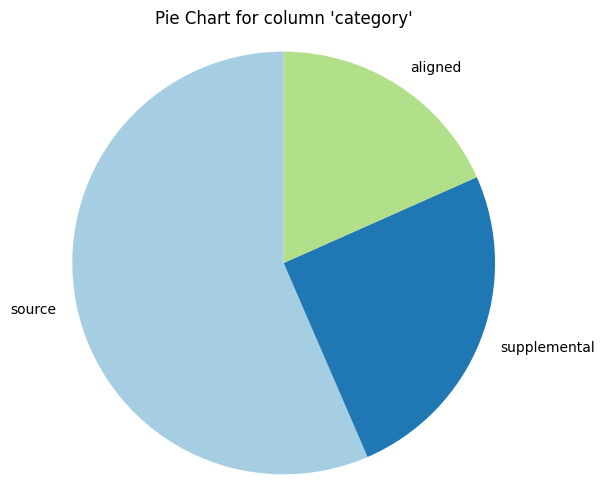

Value counts for column 'level':
level
4     38810
3     14898
5      9744
6      6210
2      4874
1      1104
7      1028
0       171
8       119
9        12
10        2
Name: count, dtype: int64




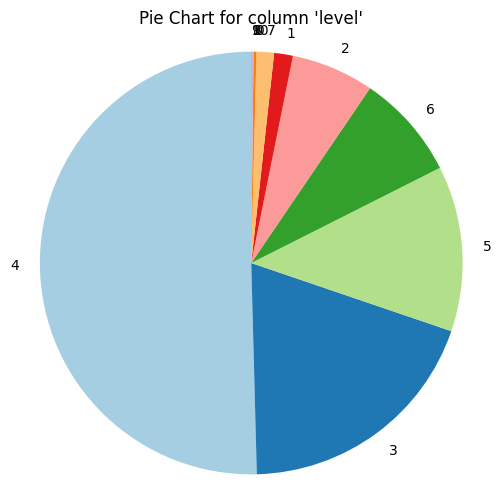

Value counts for column 'language':
language
en     36161
es     13910
pt      4177
ar      3701
fr      3701
bg      2867
sw      2860
gu      2320
bn      2176
hi      1786
it       866
zh       862
mr       300
fil      247
as       167
my       135
km       121
kn       119
te        93
or        70
ur        66
ta        60
pnb       51
pl        43
tr        40
swa       35
ru        34
mul        4
Name: count, dtype: int64




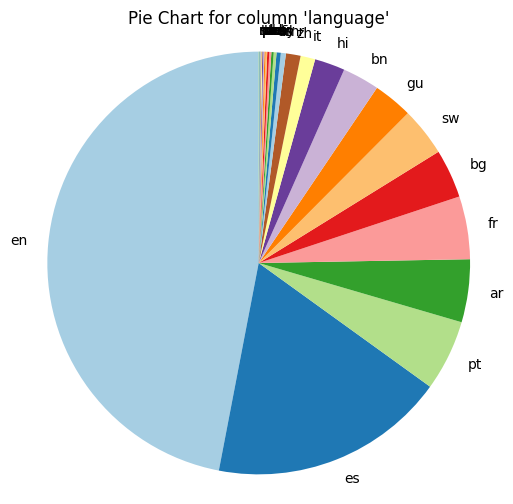

Value counts for column 'has_content':
has_content
True     61517
False    15455
Name: count, dtype: int64




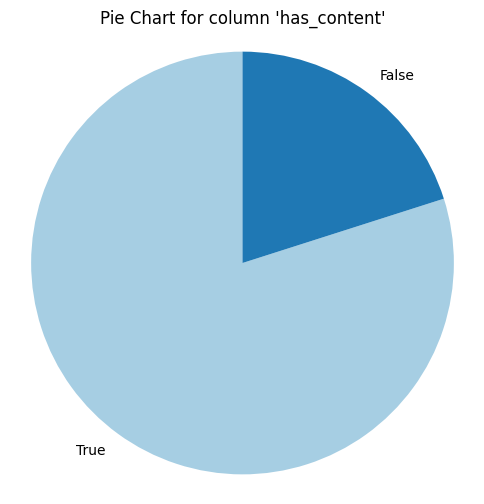

In [11]:
value_counts_all(topic, ["category", "level", "language", "has_content"])

In [15]:
def cat_cat_dist(data=None, feat1="", feat2="", feat1_lim="all", h=True, figsize=(16, 4), title="", title_fontsize=20, rotate=False, cut_xlabel=False):
    data_copy = data.copy()
    data_copy.loc[:, "count"] = 1
    if feat1_lim != "all":
        feat1_lim_value = data_copy[feat1].value_counts().index[:feat1_lim]
        data_copy = data_copy.loc[data_copy[feat1].isin(feat1_lim_value), :]
        if cut_xlabel:
            data_copy[feat1] = data_copy[feat1].str[:int((1/feat1_lim)*400)]
    data_copy = data_copy.groupby([feat1, feat2], as_index=False).agg({"count":"sum"})
    data_copy_div = data_copy.groupby([feat1], as_index=False).agg({"count":"sum"})
    data_copy_div.columns = [feat1, "div"]
    data_copy = data_copy.merge(data_copy_div, on=feat1)
    data_copy["normalized_count"] = data_copy["count"] / data_copy["div"]
    data_copy.sort_values("count", inplace=True, ascending=False)
    if h:
        fig, axes = plt.subplots(2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()

In [16]:
content_ids_df = pd.DataFrame()
content_ids = correlations["content_ids"].str.split(" ")
content_ids_df["topic_id"] = correlations["topic_id"].values
content_ids_df["content_ids"] = content_ids
content_ids_df["content_ids_len"] = content_ids.str.len()
content_ids_df = content_ids_df.merge(topic[["id", "has_content"]], left_on="topic_id", right_on="id")

content_ids_df.head()

,topic_id,content_ids,content_ids_len,id,has_content
0,t_00004da3a1b2,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4,t_00004da3a1b2,True
1,t_00068291e9a4,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4,t_00068291e9a4,True
2,t_00069b63a70a,[c_11a1dc0bfb99],1,t_00069b63a70a,True
3,t_0006d41a73a8,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5,t_0006d41a73a8,True
4,t_0008768bdee6,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3,t_0008768bdee6,True


In [17]:
content_ids_df.groupby("has_content").agg({"content_ids_len":["mean", "median"]})

content_ids_len       
                       mean median
has_content                       
True               4.550271    3.0

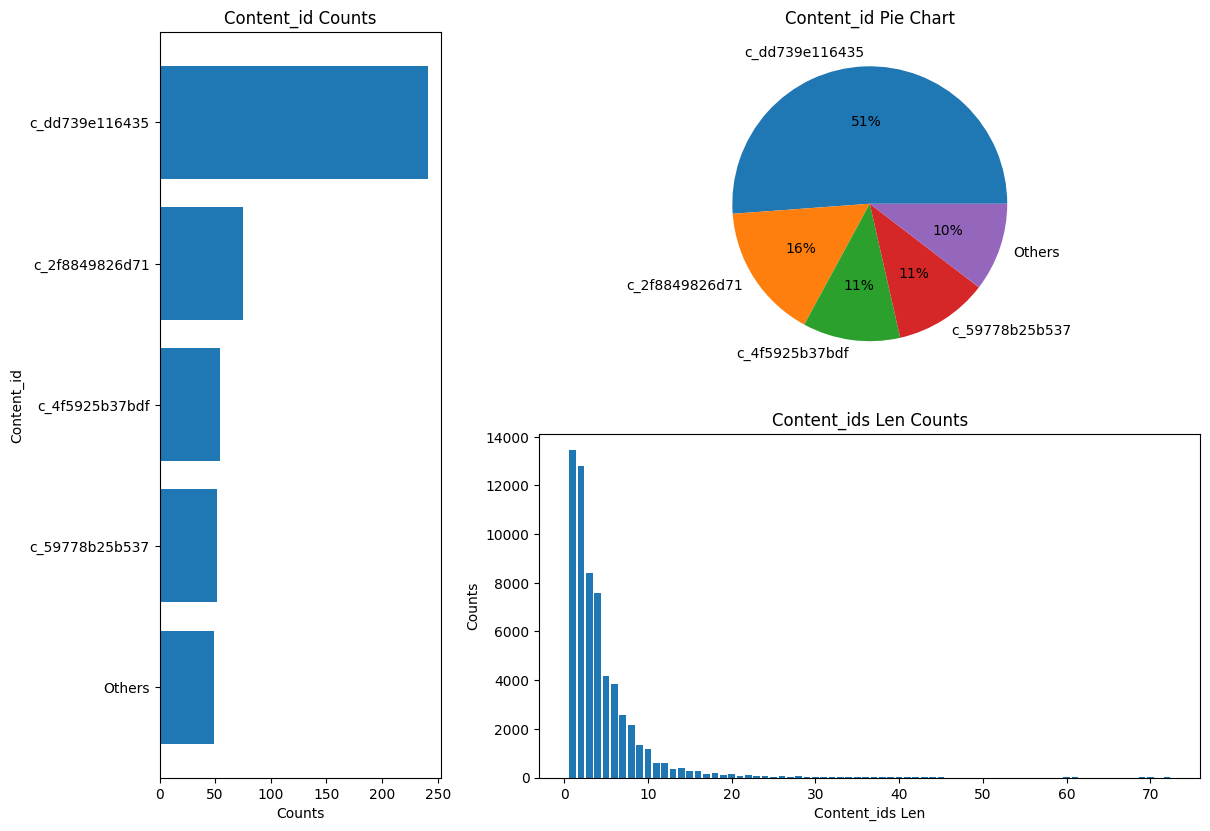

In [18]:
fig = plt.figure(figsize=(16, 12)) # initialize figure
axes = [None for _ in range(3)] # list to save many ax for setting parameter in each
axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1, rowspan=2)
axes[1] = plt.subplot2grid((3,4), (0,1), colspan=2)
axes[2] = plt.subplot2grid((3,4), (1,1), colspan=2)

# Chart 0
content_dict = {content_id: 0 for content_id in content["id"]}
for index, row in content_ids_df.iterrows():
    for content_id in row["content_ids"]:
        content_dict[content_id] = content_dict.get(content_id, 0) + 1

content_ids_count_series = pd.Series(content_dict)
content_ids_count_series.sort_values(inplace=True, ascending=False)

content_ids_count_df = content_ids_count_series.to_frame()
content_ids_count_df.reset_index(inplace=True)
content_ids_count_df.columns = ["content_id", "count"]

content_ids_count_df.loc[content_ids_count_df["count"]<=49, ["content_id", "count"]] = ["Others", 49]
content_ids_count_df.drop_duplicates(inplace=True)

axes[0].barh(content_ids_count_df["content_id"][::-1], content_ids_count_df["count"][::-1]);
axes[0].set_title("Content_id Counts")
axes[0].set_xlabel("Counts")
axes[0].set_ylabel("Content_id")

# Chart 1
axes[1].pie(content_ids_count_df["count"], labels = content_ids_count_df["content_id"],  autopct='%.0f%%');
axes[1].set_title("Content_id Pie Chart")

# Chart 2
content_ids_len_counts = content_ids_df["content_ids_len"].value_counts()[:50]
axes[2].bar(content_ids_len_counts.index, content_ids_len_counts.values)
axes[2].set_title("Content_ids Len Counts")
axes[2].set_xlabel("Content_ids Len")
axes[2].set_ylabel("Counts");

fig.tight_layout()

In [19]:
content_ids_df.head()

,topic_id,content_ids,content_ids_len,id,has_content
0,t_00004da3a1b2,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4,t_00004da3a1b2,True
1,t_00068291e9a4,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4,t_00068291e9a4,True
2,t_00069b63a70a,[c_11a1dc0bfb99],1,t_00069b63a70a,True
3,t_0006d41a73a8,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5,t_0006d41a73a8,True
4,t_0008768bdee6,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3,t_0008768bdee6,True


In [20]:
def target_content_dist(feature="kind", ncols=3, h=False, figsize=(16,8)):
    feature_unique = content[feature].unique()
    feat_dict = {v: {v_inner:0 for v_inner in feature_unique} for v in feature_unique}

    content_id_map = content.set_index("id").to_dict()[feature]
    for index, row in content_ids_df.iterrows():
        row_values = []
        for content_id in row["content_ids"]:
            row_values.append(content_id_map[content_id])
        for v_uniq in set(row_values):
            for f_uniq in feature_unique:
                feat_dict[v_uniq][f_uniq] += row_values.count(f_uniq)
            feat_dict[v_uniq][v_uniq] -= 1

    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, ax in enumerate(axes.ravel()[:len(feature_unique)+1]):
        if h:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.barh(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.barh(list(feat_dict[feat_name].keys()), list(feat_dict[feat_name].values()))
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
        else:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.bar(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.bar(feat_dict[feat_name].keys(), feat_dict[feat_name].values())
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique)+1:]:
        ax.set_visible(False)
    fig.tight_layout()

In [42]:
def content_ids_len_analysis(feature_name="kind", ncols=3, figsize=(16,8)):
    from matplotlib.offsetbox import AnchoredText
    
    feature_unique = content[feature_name].unique()
    df_content_ids_analysis = pd.DataFrame()

    content_ids_df.head()
    
    for index, row in content_ids_df.iterrows():
        feature_dict = {feature_id: 0 for feature_id in feature_unique}
        content_part = content.loc[content["id"].isin(row["content_ids"]), :]
        value_counts = content_part[feature_name].value_counts()
        for v in feature_unique:
            try:
                feature_dict[v] = value_counts[v]
            except:
                feature_dict[v] = 0
        
        #Fix error: DataFrame has no attribute "append"
        df_content_ids_analysis = pd.concat([df_content_ids_analysis, pd.DataFrame([feature_dict])], ignore_index=True)
        
    df_content_ids_analysis["content_ids_len"] = content_ids_df["content_ids_len"].values
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, (ax, feature) in enumerate(zip(axes.ravel()[:len(feature_unique)], feature_unique)):
        corr = df_content_ids_analysis[feature].corr(df_content_ids_analysis["content_ids_len"])
        scatter_kws = dict(
            alpha=0.75,
            s=3,
        )
        line_kws = dict(color='C3', )
        ax = sns.regplot(x=df_content_ids_analysis[feature],
                         y=df_content_ids_analysis["content_ids_len"],
                         scatter_kws=scatter_kws,
                         line_kws=line_kws,
                         lowess=True,
                         ax=ax)
        at = AnchoredText(
            f"{corr:.2f}",
            prop=dict(size="large"),
            frameon=True,
            loc="upper left",
        )
        at.patch.set_boxstyle("square, pad=0.0")
        ax.add_artist(at)
        
        ax.set_title(f"{feature} - content_ids_len scatter plot")
        ax.set_ylabel("content_ids_len")
        ax.set_xlabel(feature)
    
    for ax in axes.ravel()[len(feature_unique):]:
        ax.set_visible(False)
    fig.tight_layout()

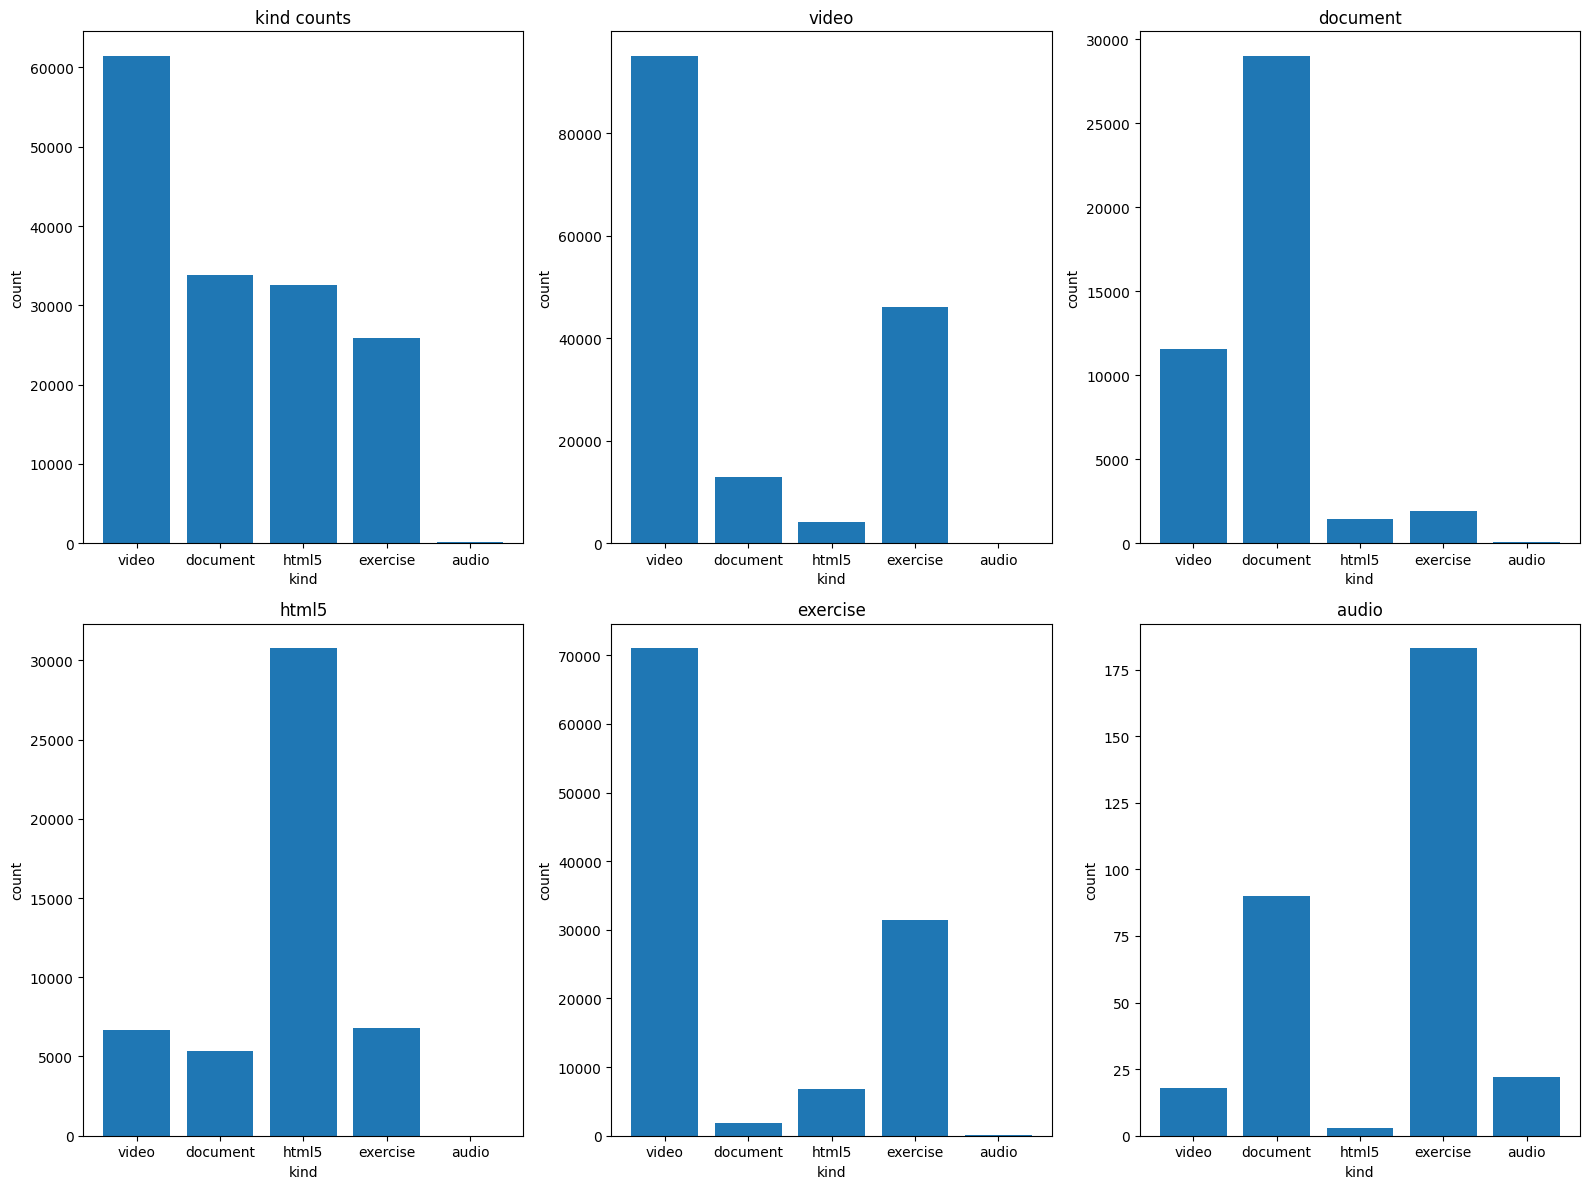

In [26]:
target_content_dist(feature="kind", ncols=3, figsize=(16,12))

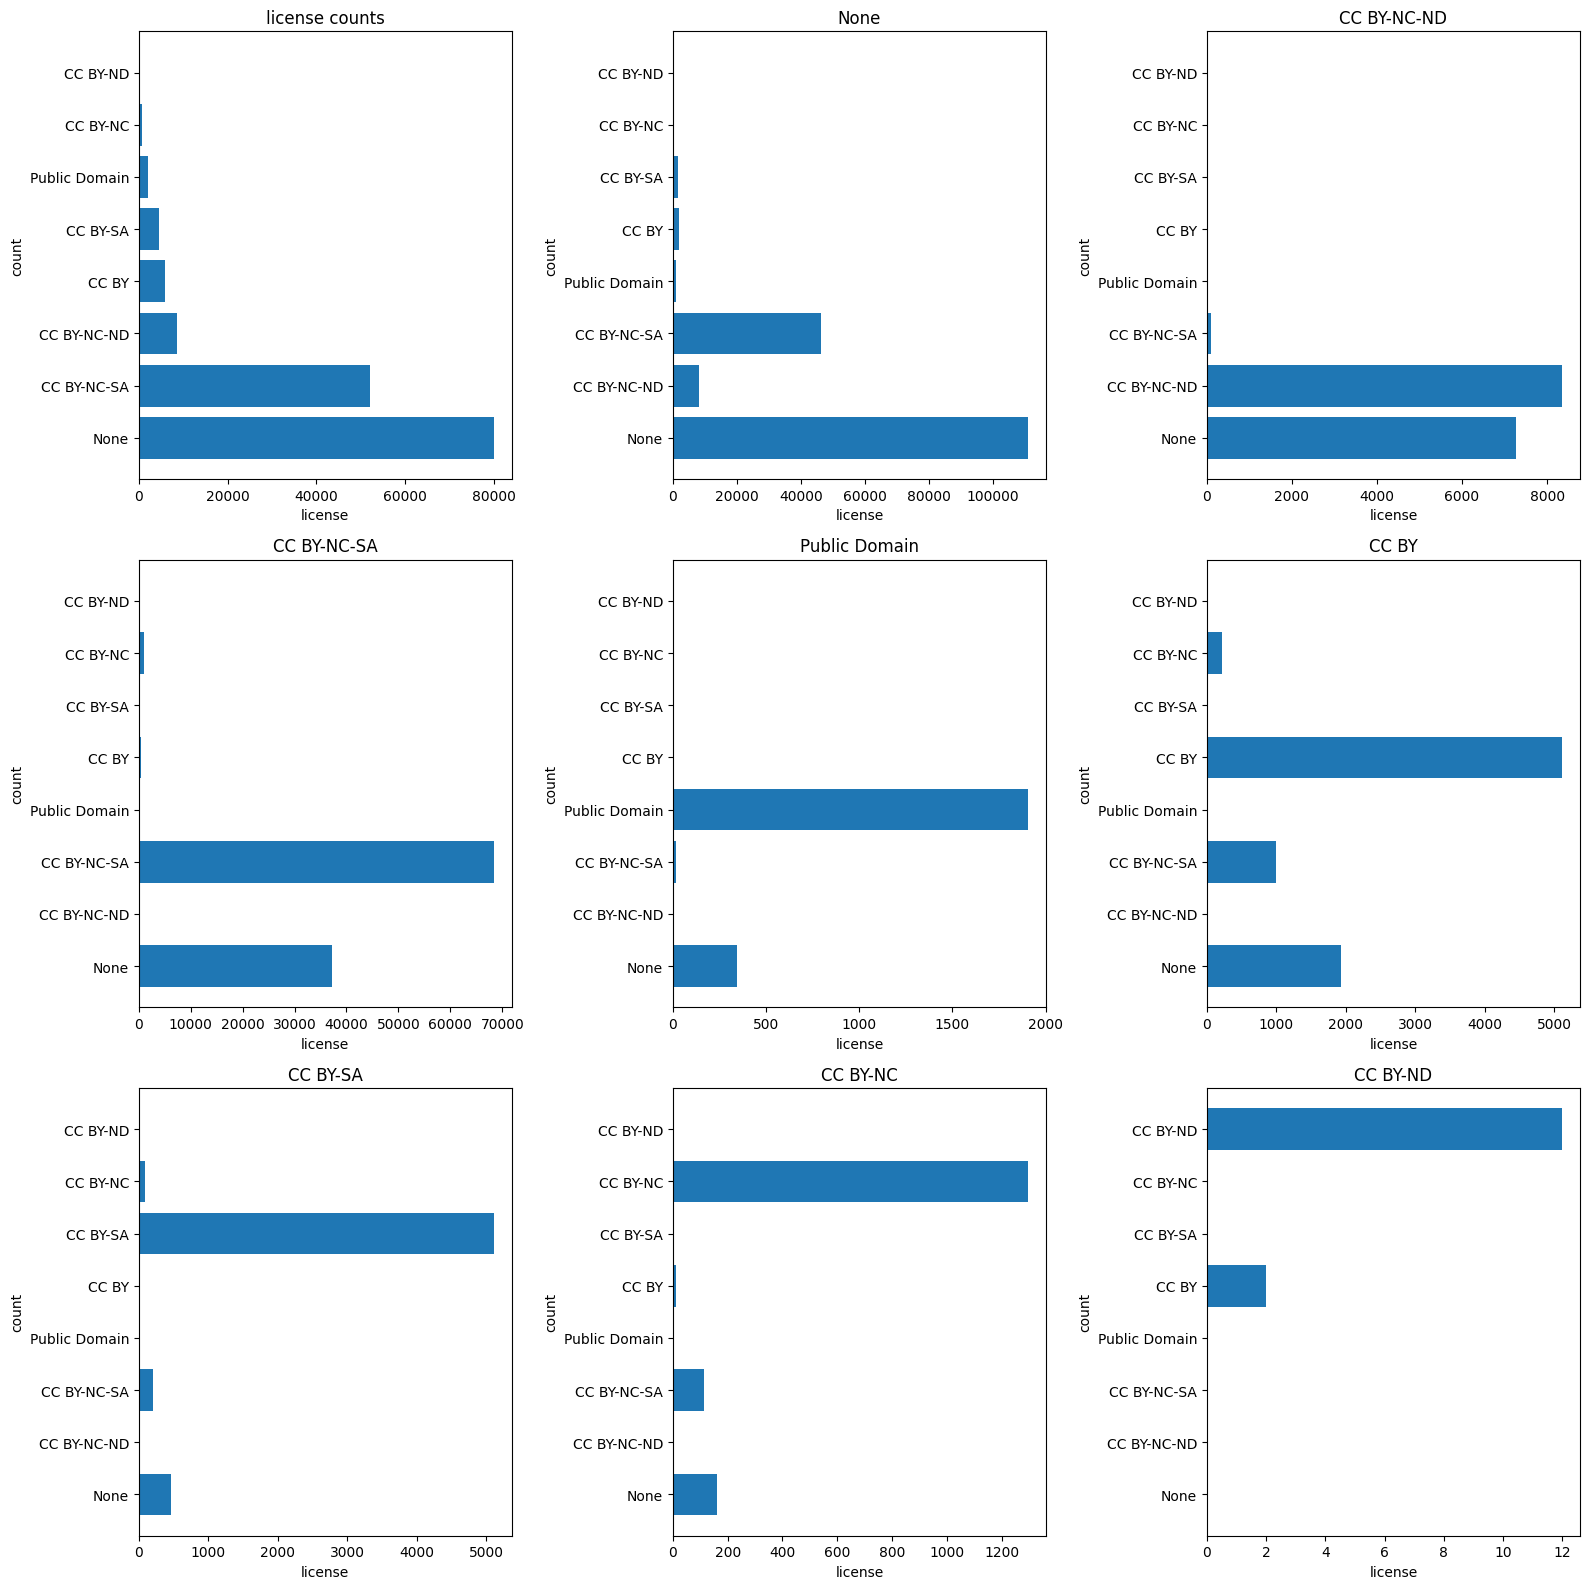

In [27]:
target_content_dist(feature="license", ncols=3, figsize=(16,16), h=True)

done 1
done 2


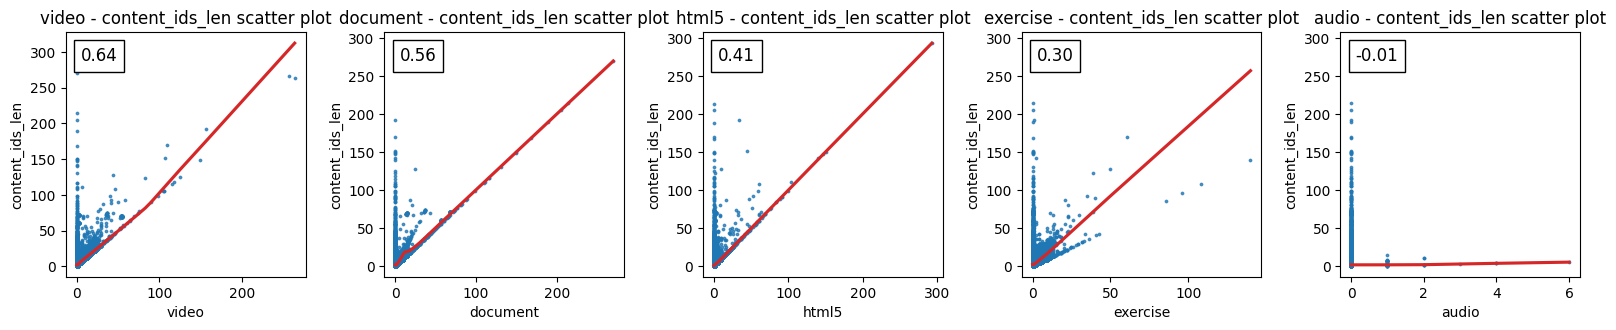

In [43]:
content_ids_len_analysis(feature_name="kind", ncols=5, figsize=(16,6))

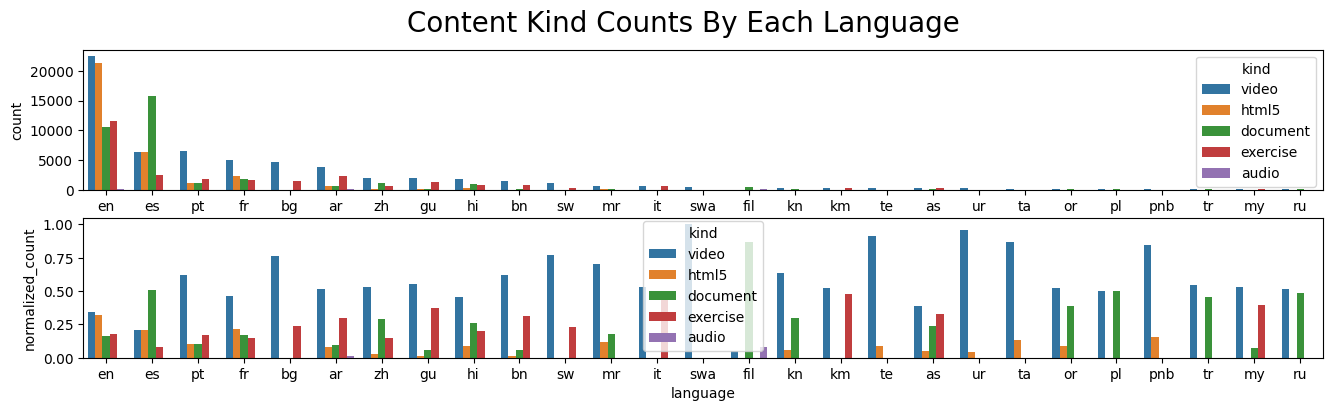

In [44]:
cat_cat_dist(data=content, feat1="language", feat2="kind", title="Content Kind Counts By Each Language")

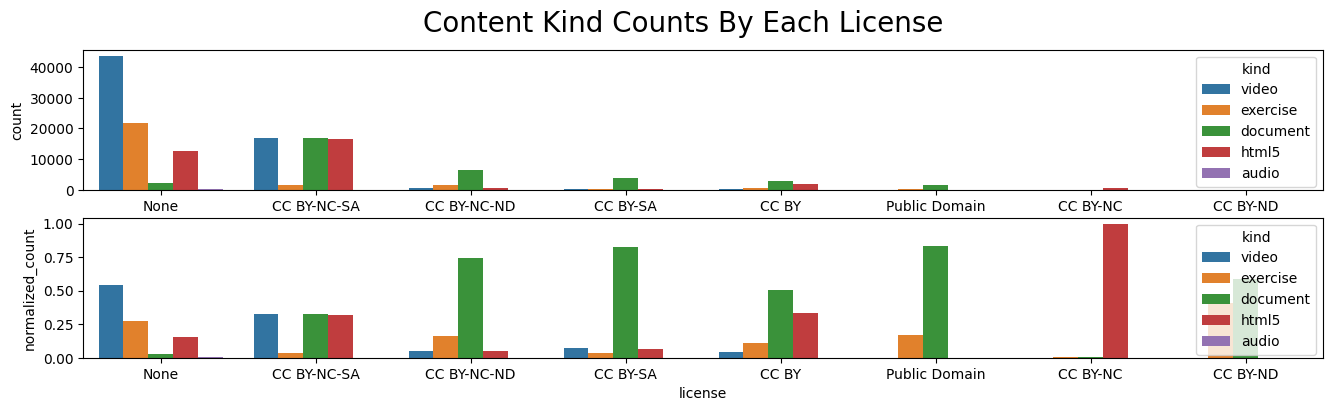

In [45]:
cat_cat_dist(data=content, feat1="license", feat2="kind", title="Content Kind Counts By Each License")

In [46]:
licenses_details = {
    "Limitation": {0:"Credit must be given to the creator", 
                  1:"Adaptations must be shared under the same terms", 
                  2:"Only noncommercial uses of the work are permitted",
                  3:"No derivatives or adaptations of the work are permitted"},
    "CC BY": {0:True, 1:False, 2:False, 3:False},
    "CC BY-ND": {0:True, 1:False, 2:False, 3:True},
    "CC BY-SA": {0:True, 1:True, 2:False, 3:False},
    "CC BY-NC": {0:True, 1:False, 2:True, 3:False},
    "CC BY-NC-SA": {0:True, 1:True, 2:True, 3:False},
    "CC BY-NC-ND": {0:True, 1:False, 2:True, 3:True},
    "Public Domain": {0:False, 1:False, 2:False, 3:False}
}

df_licenses_def = pd.DataFrame(licenses_details)
df_licenses_def.set_index("Limitation", inplace=True)
df_licenses_def

,CC BY,CC BY-ND,CC BY-SA,CC BY-NC,CC BY-NC-SA,CC BY-NC-ND,Public Domain
Limitation,,,,,,,
Credit must be given to the creator,True,True,True,True,True,True,False
Adaptations must be shared under the same terms,False,False,True,False,True,False,False
Only noncommercial uses of the work are permitted,False,False,False,True,True,True,False
No derivatives or adaptations of the work are permitted,False,True,False,False,False,True,False


In [47]:
df_licenses_def.T.to_csv("license_limitations.csv")

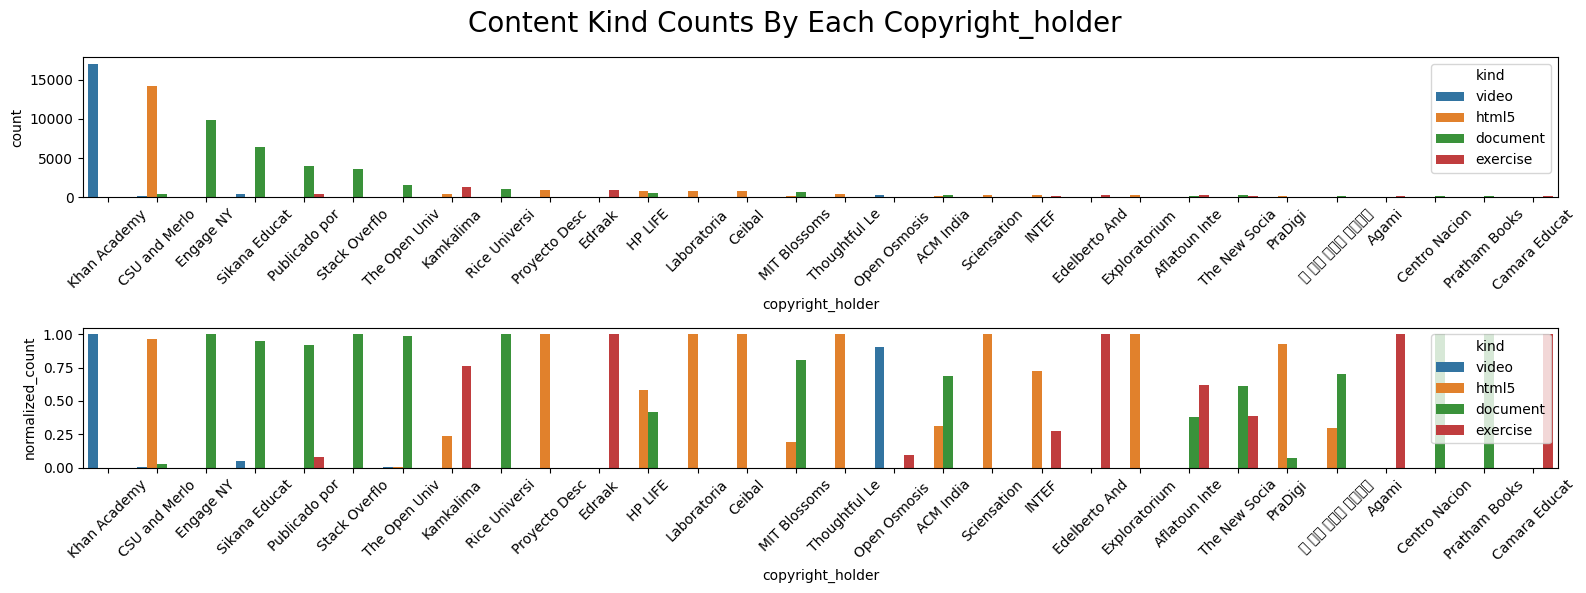

In [48]:
cat_cat_dist(data=content, feat1="copyright_holder", feat2="kind", title="Content Kind Counts By Each Copyright_holder", 
             feat1_lim=30, figsize=(16,6), rotate=True, cut_xlabel=True)

# TOPIC

In [49]:
content["title_len"] = content["title"].str.len()
content["description_len"] = content["description"].str.len()
content["text_len"] = content["text"].str.len()

content[["title_len", "description_len", "text_len"]].describe()

,title_len,description_len,text_len
count,154038.000000,89456.000000,74035.000000
mean,33.829782,124.291249,10531.613440
std,18.106550,250.144003,18016.019783
min,1.000000,1.000000,1.000000
25%,21.000000,51.000000,1853.000000
50%,31.000000,82.000000,4486.000000
75%,44.000000,122.000000,10016.000000
max,177.000000,9710.000000,100000.000000


In [50]:
topic.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


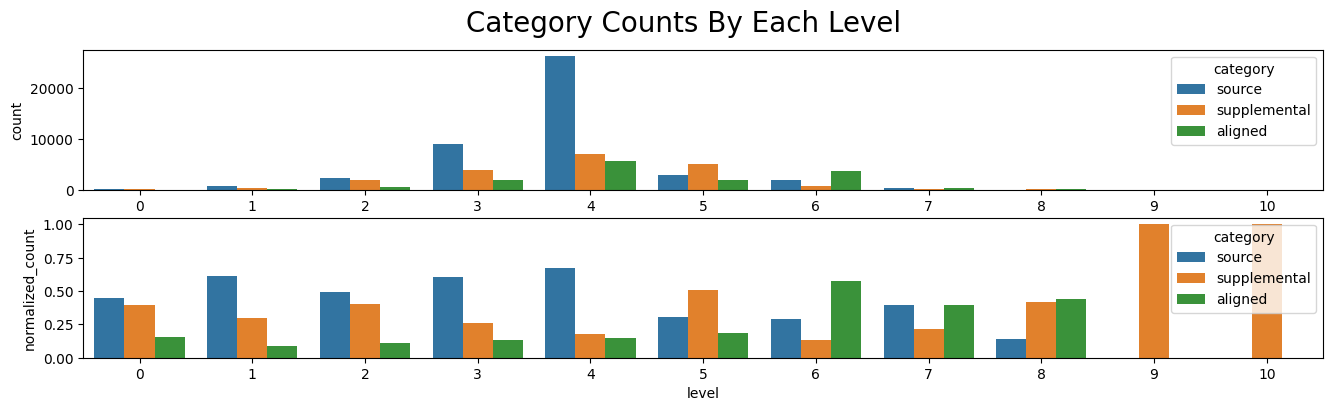

In [51]:
cat_cat_dist(data=topic, feat1="level", feat2="category", title="Category Counts By Each Level")

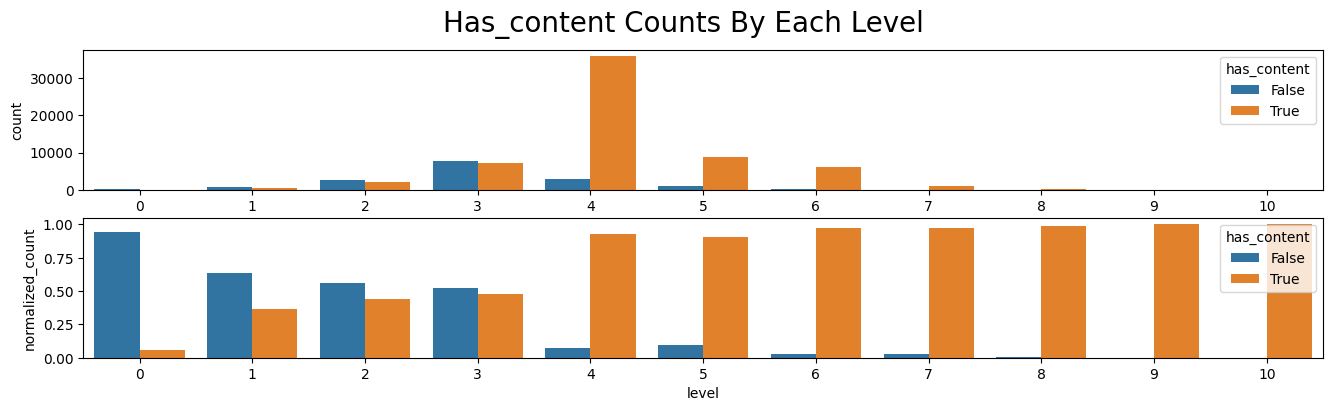

In [52]:
cat_cat_dist(data=topic, feat1="level", feat2="has_content", title="Has_content Counts By Each Level")

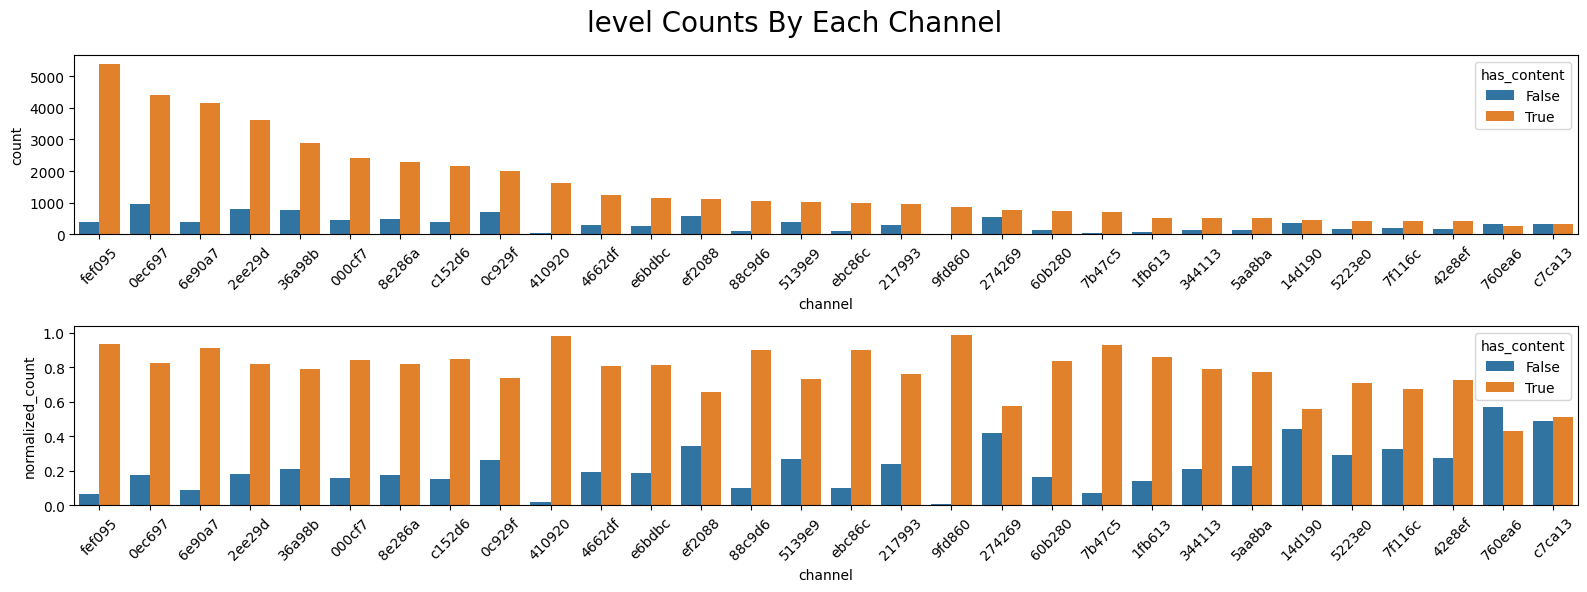

In [53]:
cat_cat_dist(data=topic, feat1="channel", feat2="has_content", title="level Counts By Each Channel",
             feat1_lim=30, figsize=(16,6), rotate=True, cut_xlabel=True)

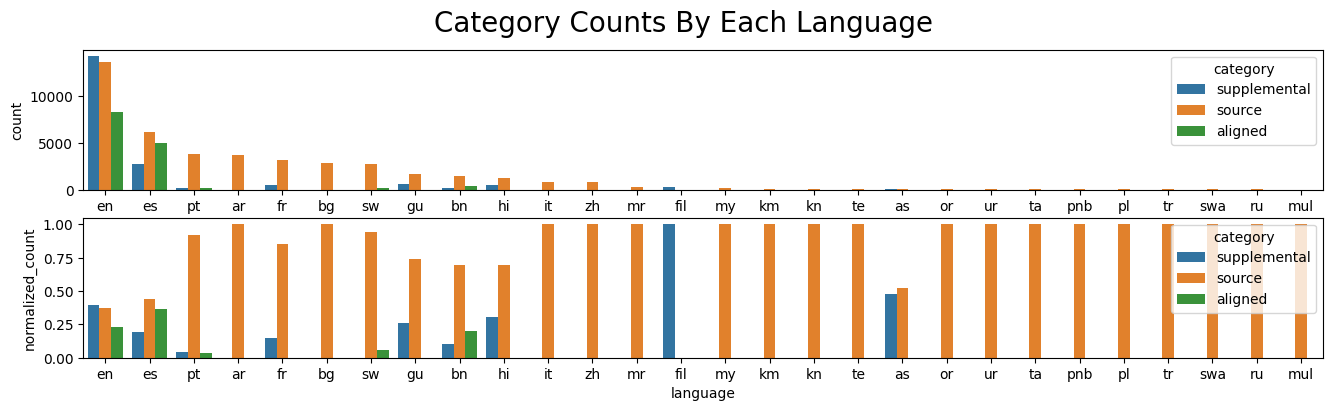

In [54]:
cat_cat_dist(data=topic, feat1="language", feat2="category", title="Category Counts By Each Language")

In [55]:
topic.loc[topic["category"]!="source", "language"].value_counts()

language
en     22549
es      7733
bn       670
gu       608
fr       552
hi       541
pt       343
fil      247
sw       162
as        80
Name: count, dtype: int64

Text(0, 0.5, 'average level')

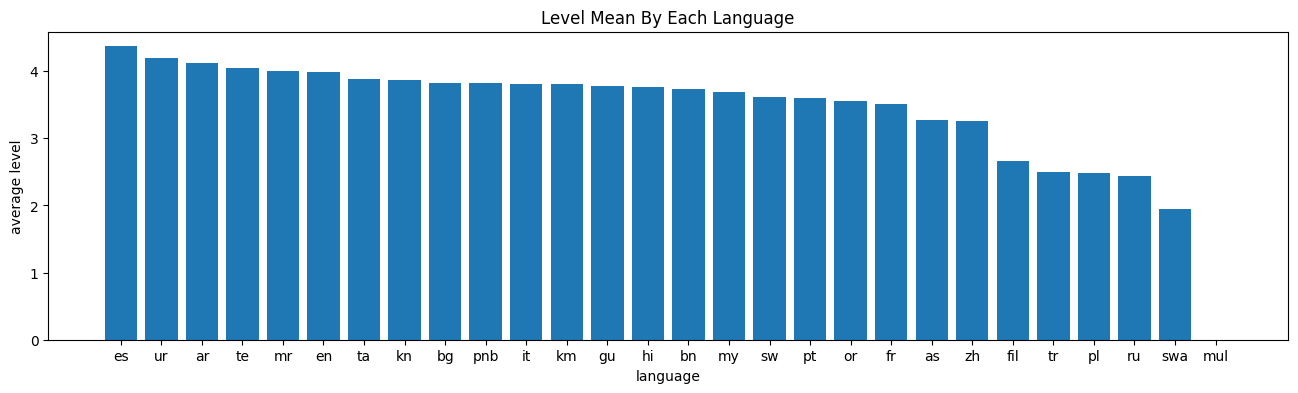

In [56]:
topic_l_l = topic.groupby("language", as_index=False).agg({"level":"mean"})
topic_l_l.sort_values("level", inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(topic_l_l["language"], topic_l_l["level"]);
ax.set_title("Level Mean By Each Language")
ax.set_xlabel("language")
ax.set_ylabel("average level")

In [57]:
topic["title_len"] = topic["title"].str.len()
topic["description_len"] = topic["description"].str.len()

topic[["title_len", "description_len"]].describe()

,title_len,description_len
count,76970.000000,34953.000000
mean,26.780343,180.194118
std,17.413044,239.347045
min,1.000000,1.000000
25%,14.000000,63.000000
50%,23.000000,121.000000
75%,36.000000,226.000000
max,200.000000,4934.000000


In [58]:
def get_tree_analysis(channel="fef095", language="en", parent=None):
    if parent is not None:
        condition = ((topic["channel"]==channel)&(topic["language"]==language)&(topic["parent"]==parent))
    else:
        condition = ((topic["channel"]==channel)&(topic["language"]==language))
    part_topic = topic.loc[condition, :].copy()
    part_topic = part_topic.merge(correlations, left_on="id", right_on="topic_id")
    part_topic["count"] = 1
    print(10*"-"+ " channel: " + channel + " " + 10*"-")
    print("id nunique: ", part_topic["id"].nunique())
    print("parent nunique: ", part_topic["parent"].nunique())
    
    content_counts = {
        'kind': {'video':0, 
                 'document':0, 
                 'html5':0, 
                 'exercise':0, 
                 'audio':0},
        'license': {"None":0, 
                    'CC BY-NC-ND':0, 
                    'CC BY-NC-SA':0, 
                    'Public Domain':0, 
                    'CC BY':0,
                    'CC BY-SA':0, 
                    'CC BY-NC':0, 
                    'CC BY-ND':0},
        'language': {'es': 0, 'it': 0, 'pt': 0, 'en': 0, 'mr': 0, 'bg': 0, 'gu': 0, 'sw': 0, 'hi': 0,
                     'ar': 0, 'bn': 0, 'as': 0, 'zh': 0, 'fr': 0, 'km': 0, 'pl': 0, 'ta': 0, 'fil': 0,
                     'or': 0, 'ru': 0, 'kn': 0, 'swa': 0, 'my': 0, 'pnb': 0, 'tr': 0, 'te': 0, 'ur': 0},
    }
    for index,row in part_topic.iterrows():
        for content_id in row["content_ids"].split(" "):
            part_content = content.loc[content["id"]==content_id, :]
            part_content.fillna("None", inplace=True)
            content_counts['kind'][part_content["kind"].values[0]] += 1
            content_counts['license'][part_content["license"].values[0]] += 1
            content_counts['language'][part_content["language"].values[0]] += 1
    
    #fig, axes = plt.subplots(5, figsize=(16,16))
    fig = plt.figure(figsize=(16, 6)) # initialize figure
    axes = [None for _ in range(5)] # list to save many ax for setting parameter in each
    axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1)
    axes[1] = plt.subplot2grid((3,4), (0,1), colspan=3)
    axes[2] = plt.subplot2grid((3,4), (1,0), colspan=1)
    axes[3] = plt.subplot2grid((3,4), (1,1), colspan=3)
    axes[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
    
    
    # Category
    part_topic_temp = part_topic.groupby("category", as_index=False).agg({"count":"sum"})
    part_topic_temp.sort_values("count", inplace=True, ascending=False)
    axes[0].bar(part_topic_temp["category"], part_topic_temp["count"])
    axes[0].set_title("Count By Each Category")
    axes[0].set_xlabel("category")
    axes[0].set_ylabel("count")
    
    # Kind
    content_kind = pd.Series(content_counts["kind"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[1].bar(content_kind.index, content_kind.values)
    axes[1].set_title("Count By Each Kind")
    axes[1].set_xlabel("kind")
    axes[1].set_ylabel("count")
    
    # Level
    part_topic_temp = part_topic.groupby("level", as_index=False).agg({"count":"sum"})
    part_topic_temp.sort_values("count", inplace=True, ascending=False)
    axes[2].bar(part_topic_temp["level"], part_topic_temp["count"])
    axes[2].set_title("Count By Each Level")
    axes[2].set_xlabel("level")
    axes[2].set_ylabel("count")
    
    # License
    content_kind = pd.Series(content_counts["license"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[3].bar(content_kind.index, content_kind.values)
    axes[3].set_title("Count By Each License")
    axes[3].set_xlabel("license")
    axes[3].set_ylabel("count")
    
    # Language
    content_kind = pd.Series(content_counts["language"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[4].bar(content_kind.index, content_kind.values)
    axes[4].set_title("Count By Each Language")
    axes[4].set_xlabel("language")
    axes[4].set_ylabel("count")
    
    fig.tight_layout()

---------- channel: af86ca ----------
id nunique:  5
parent nunique:  1


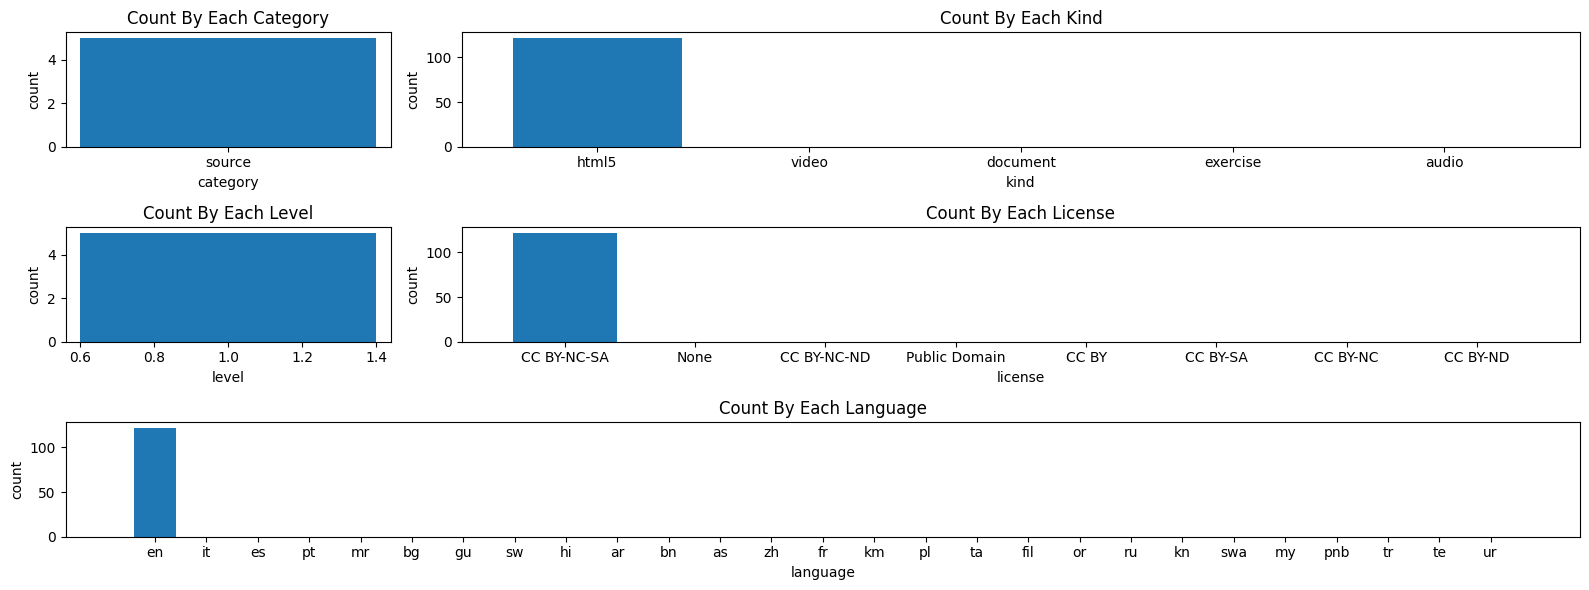

In [59]:
get_tree_analysis(channel="af86ca", language="en")

---------- channel: fef095 ----------
id nunique:  112
parent nunique:  1


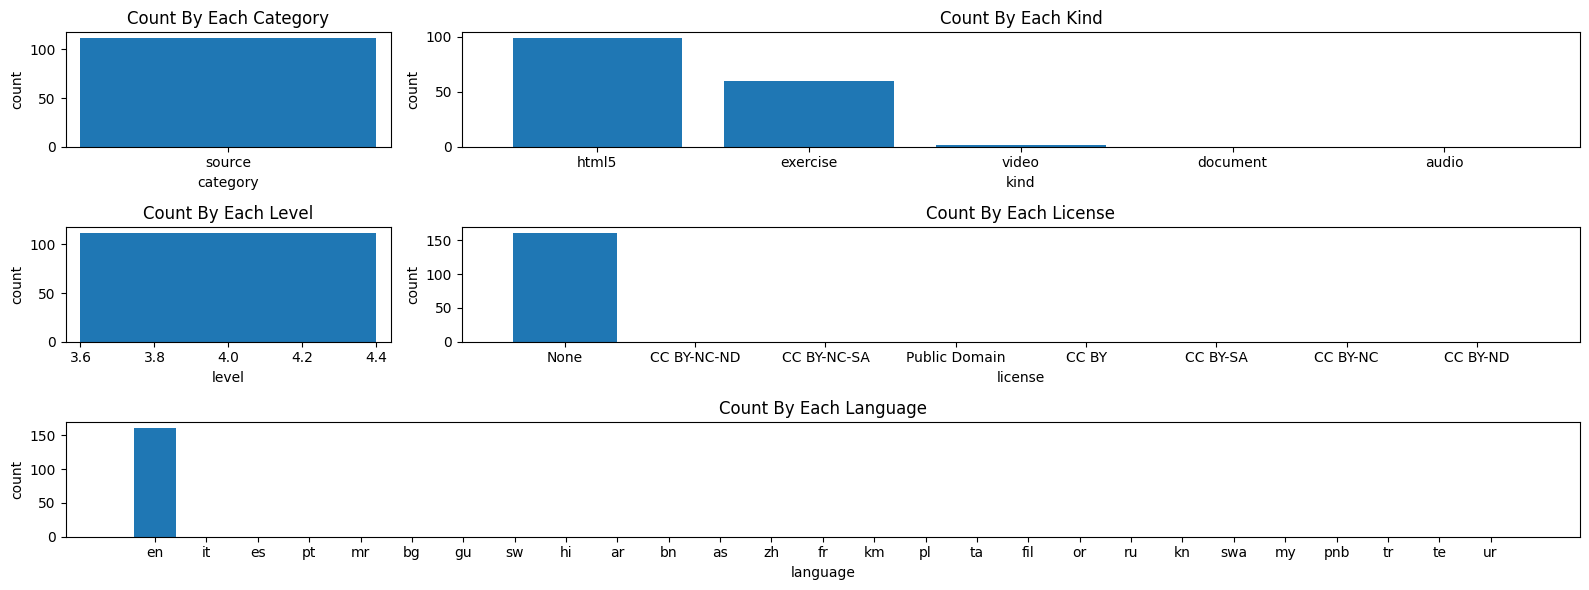

In [60]:
get_tree_analysis(channel="fef095", language="en", parent="t_009fc1677c8e")

---------- channel: fef095 ----------
id nunique:  5394
parent nunique:  308


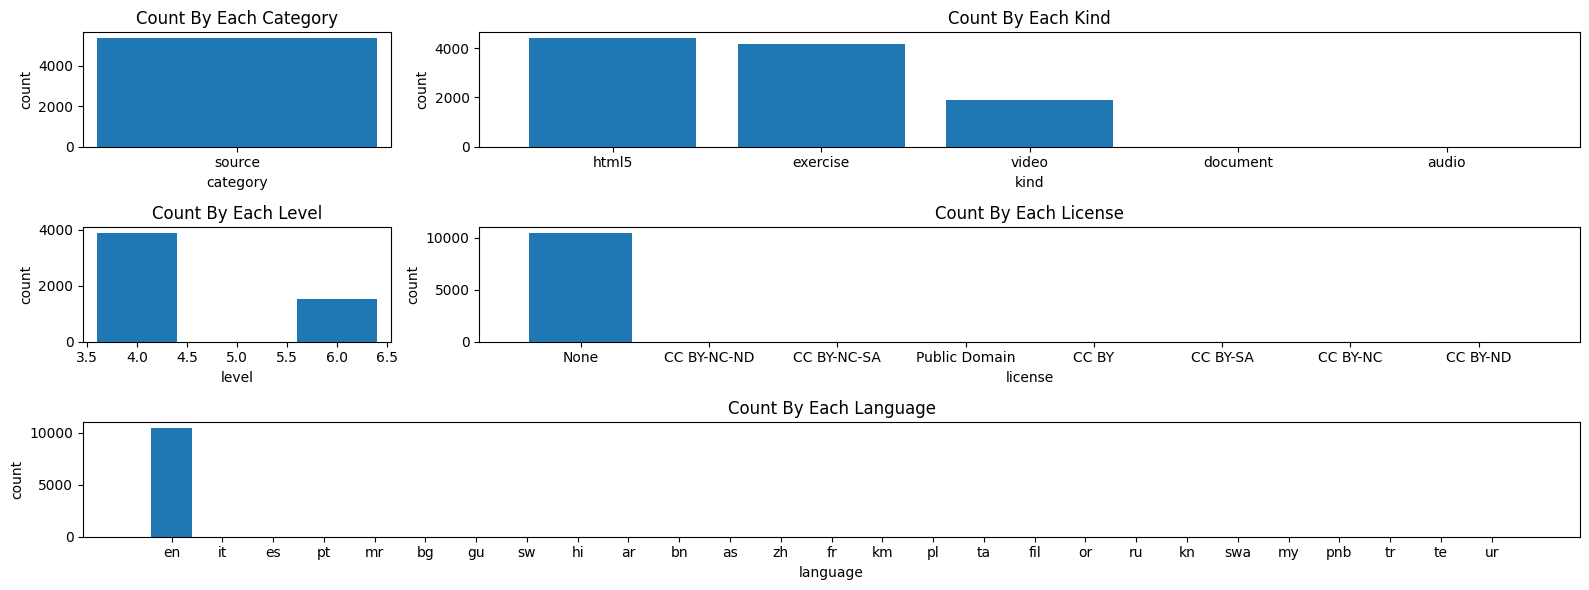

In [61]:
get_tree_analysis(channel="fef095", language="en", parent=None)